In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from scipy import interpolate

In [2]:
from kneed import KneeLocator, DataGenerator as dg

## Curves

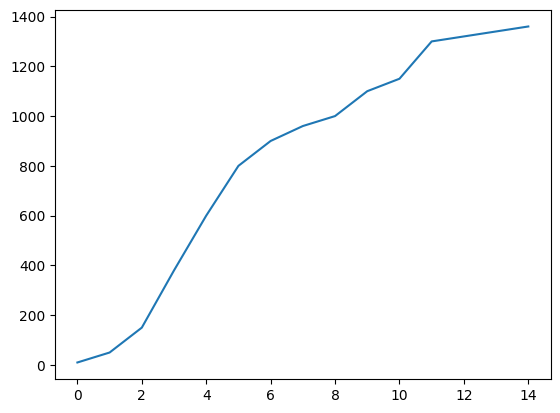

In [3]:
y_1 = [10, 50, 150, 380, 600, 800, 900, 960, 1000, 1100, 1150, 1300, 1320, 1340, 1360]
x_1 = [i for i in range(len(y_1))]

plt.plot(x_1, y_1)

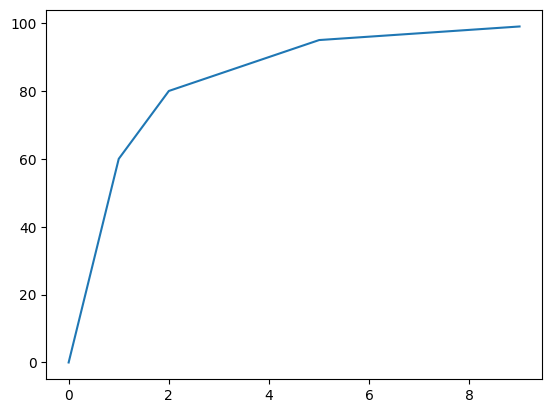

In [4]:
x_2, y_2 = dg.concave_increasing()
plt.plot(x_2, y_2)

In [5]:
def spline(x, y):
    uspline = interpolate.interp1d(x, y)
    return x, uspline(x)

def invert(x, y):
    x = np.array(x)
    y = np.array(y)
    
    y = np.max(y) - y
    x = np.max(x) - x
    
    return x, y

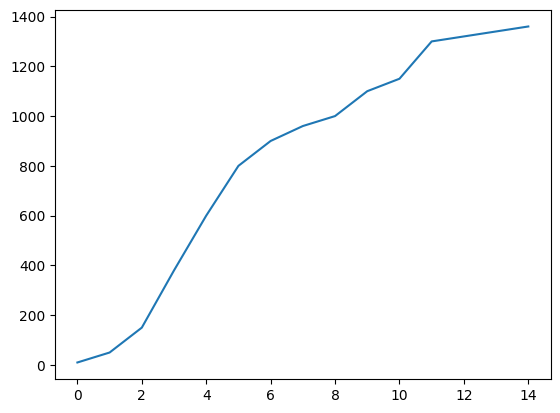

In [6]:
x_1, y_1 = spline(x_1, y_1)
plt.plot(x_1, y_1)

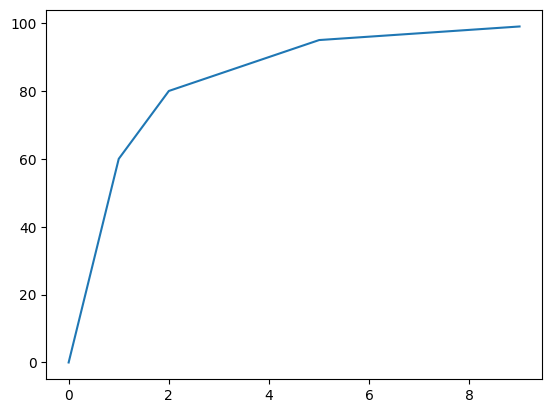

In [7]:
x_2, y_2 = spline(x_2, y_2)
plt.plot(x_2, y_2)

In [8]:
def max_min(x, y):
    x = np.array(x)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    
    y = np.array(y)
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return x, y

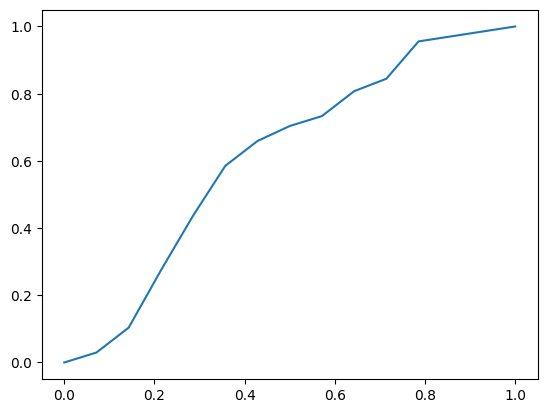

In [9]:
x_1_norm, y_1_norm = max_min(x_1, y_1)

plt.plot(x_1_norm, y_1_norm)

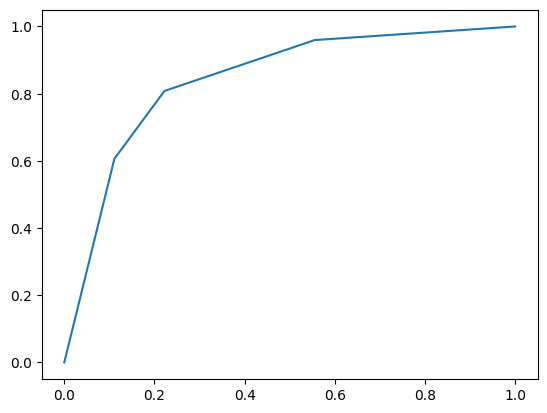

In [10]:
x_2_norm, y_2_norm = max_min(x_2, y_2)

plt.plot(x_2_norm, y_2_norm)


In [11]:
def differences(x, y):
    return y - x

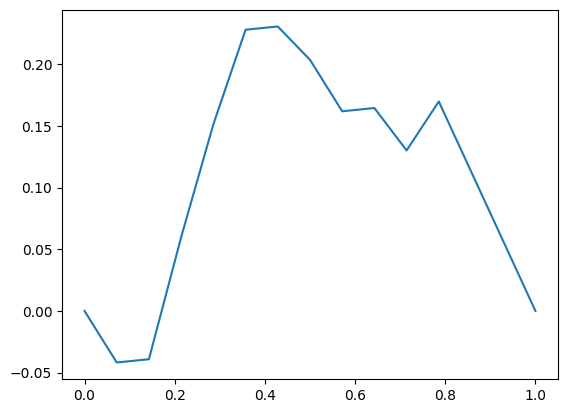

In [12]:
y_1_diff = differences(x_1_norm, y_1_norm)

plt.plot(x_1_norm, y_1_diff)

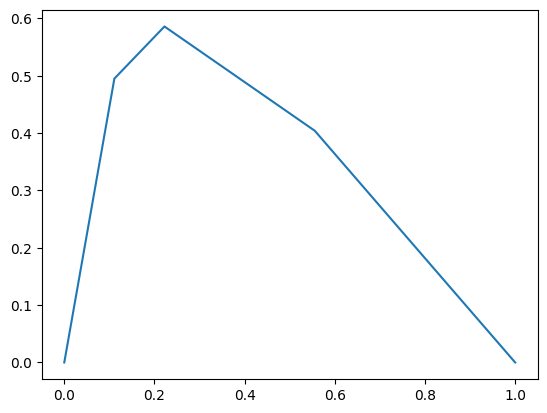

In [13]:
y_2_diff = differences(x_2_norm, y_2_norm)

plt.plot(x_2_norm, y_2_diff)

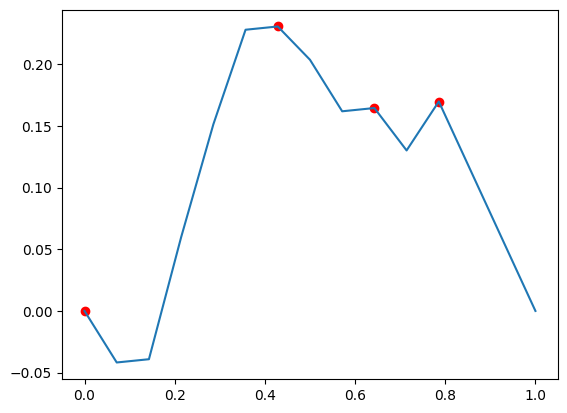

In [14]:
maxima_idxs = argrelextrema(y_1_diff, np.greater_equal)
plt.plot(x_1_norm, y_1_diff)
plt.scatter(x_1_norm[maxima_idxs], y_1_diff[maxima_idxs], c='r')

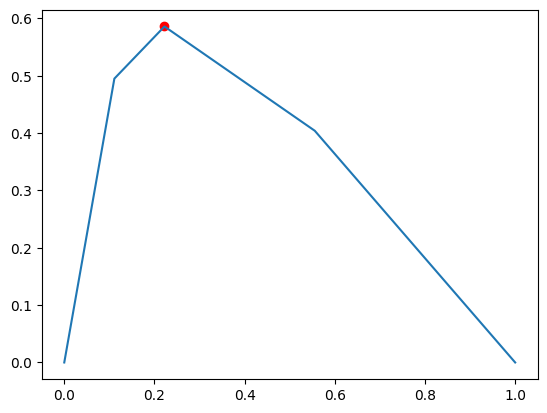

In [15]:
maxima_idxs_2 = argrelextrema(y_2_diff, np.greater_equal)
plt.plot(x_2_norm, y_2_diff)
plt.scatter(x_2_norm[maxima_idxs_2], y_2_diff[maxima_idxs_2], c='r')

In [16]:
S = 1

Ts = y_1_diff[maxima_idxs] - (S * np.abs(np.diff(x_1_norm).mean()))

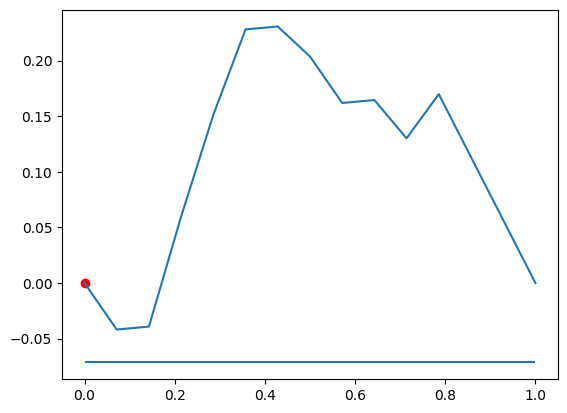

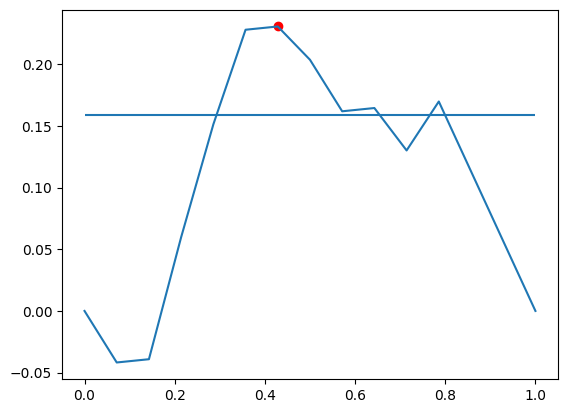

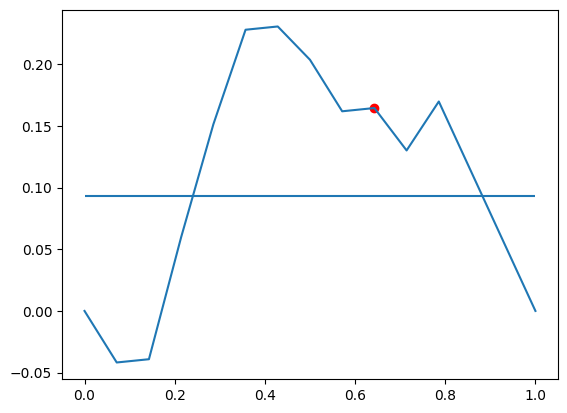

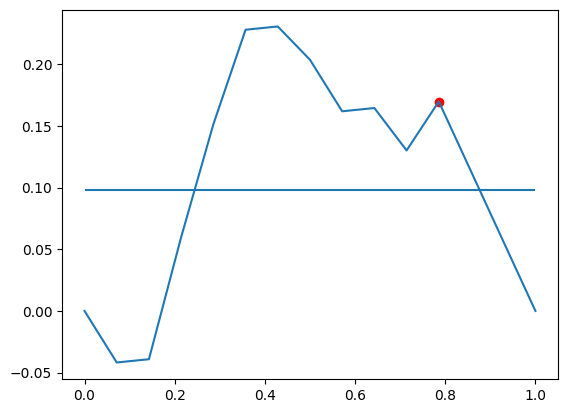

In [17]:
for i, maxima in enumerate(maxima_idxs[0]):
    plt.figure()
    plt.plot(x_1_norm, y_1_diff)
    plt.scatter(x_1_norm[maxima], y_1_diff[maxima], c='r')
    plt.hlines(y=Ts[i], xmin=x_1_norm[0], xmax=x_1_norm[-1])

In [18]:
S = 1

Ts_2 = y_2_diff[maxima_idxs_2] - (S * np.abs(np.diff(x_2_norm).mean()))

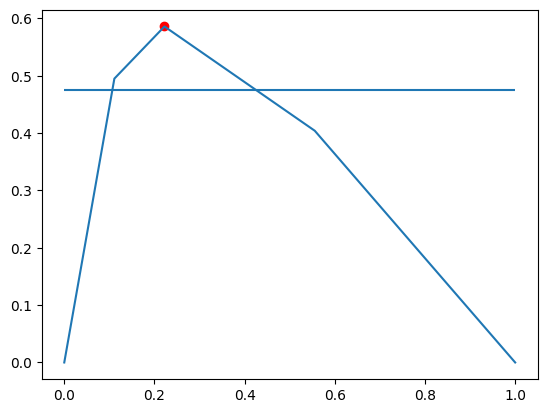

In [19]:
for i, maxima in enumerate(maxima_idxs_2[0]):
    plt.figure()
    plt.plot(x_2_norm, y_2_diff)
    plt.scatter(x_2_norm[maxima], y_2_diff[maxima], c='r')
    plt.hlines(y=Ts_2[i], xmin=x_2_norm[0], xmax=x_2_norm[-1])

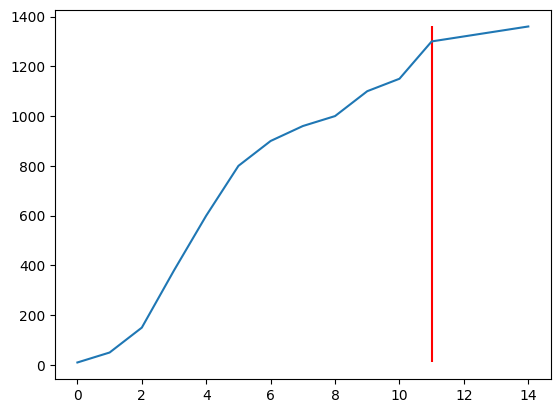

In [20]:
plt.vlines(x_1[maxima_idxs[0][-1]], ymin=min(y_1), ymax=max(y_1), colors='r')
plt.plot(x_1, y_1)

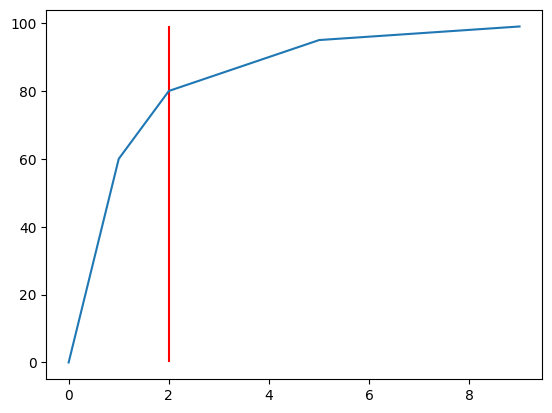

In [22]:
plt.vlines(x_2[maxima_idxs_2[0][0]], ymin=min(y_2), ymax=max(y_2), colors='r')
plt.plot(x_2, y_2)

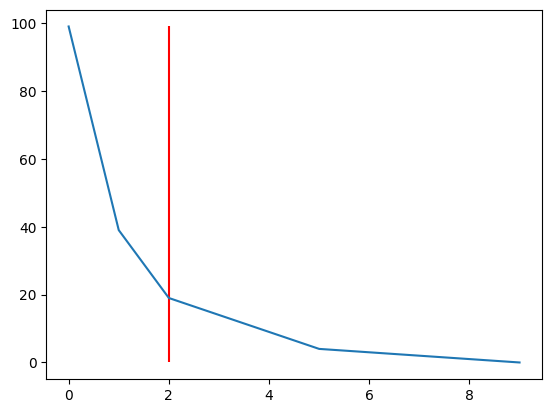

In [27]:
plt.vlines(x_2[maxima_idxs_2[0][0]], ymin=min(y_2), ymax=max(y_2), colors='r')
plt.plot(x_2, y_2.max() - y_2)